In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
plt.style.use('fivethirtyeight')


In [40]:
#read in the data
data = pd.read_csv('ETH-USD.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-01,1/1/2019,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,1/2/2019,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,1/3/2019,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,1/4/2019,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05,1/5/2019,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...,...
2023-03-27,3/27/2023,1775.481323,1781.379272,1690.516602,1715.460815,1715.460815,8585750760
2023-03-28,3/28/2023,1715.327393,1791.110962,1702.564697,1772.785645,1772.785645,8346890042
2023-03-29,3/29/2023,1772.899902,1825.600952,1772.899902,1793.001831,1793.001831,9136176952


In [41]:
future_day= 30

In [42]:
#Create a new column
#data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
#Show the data
data[['Close', str(future_day)+'_Day_Price_Forecast']]
#data



,Close,30_Day_Price_Forecast
Date,,
2019-01-01,140.819412,107.061012
2019-01-02,155.047684,107.609787
2019-01-03,149.135010,110.430260
2019-01-04,154.581940,107.492668
2019-01-05,155.638596,107.821602
...,...,...
2023-03-27,1715.460815,NaN
2023-03-28,1772.785645,NaN
2023-03-29,1793.001831,NaN


In [43]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_day]
print(X)

[[ 140.819412]
 [ 155.047684]
 [ 149.13501 ]
 ...
 [1634.326416]
 [1605.895142]
 [1663.433716]]


In [44]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[ 107.061012  107.609787  110.43026  ... 1793.001831 1792.737183
 1822.022095]


In [45]:
val = np.array(data[['Close']])
val = val[- future_day:]
val


array([[1647.319336],
       [1569.167603],
       [1566.92395 ],
       [1564.46875 ],
       [1567.398682],
       [1561.933105],
       [1534.088257],
       [1438.660767],
       [1429.158081],
       [1482.616699],
       [1590.292969],
       [1680.30896 ],
       [1703.50708 ],
       [1656.180542],
       [1677.215454],
       [1792.485107],
       [1761.659668],
       [1785.576538],
       [1735.321289],
       [1806.760742],
       [1737.717041],
       [1816.405151],
       [1752.0448  ],
       [1743.764771],
       [1775.676758],
       [1715.460815],
       [1772.785645],
       [1793.001831],
       [1792.737183],
       [1822.022095]])

In [46]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.7)]
Y_train = Y[:int(Y.shape[0]*0.7)]

X_val = X[int(X.shape[0]*0.7):int(X.shape[0]*0.8)]
Y_val = Y[int(Y.shape[0]*0.7):int(Y.shape[0]*0.8)]

X_test = X[int(X.shape[0]*0.8):]
Y_test = Y[int(Y.shape[0]*0.8):]



In [47]:
len(X_test)

305

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Close']])

c:\APP\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [49]:
print(X_pred)

[[-0.68672216]
 [-0.67533724]
 [-0.68006834]
 ...
 [ 0.63529116]
 [ 0.6350794 ]
 [ 0.65851207]]


In [50]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C': [ 100, 1000, 10000, 100000],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'poly', 'rbf','sigmoid']}

In [51]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [52]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=8, verbose=5)



In [53]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

Fitting 8 folds for each of 64 candidates, totalling 512 fits
[CV 1/8] END .C=100, gamma=0.001, kernel=linear;, score=0.410 total time=   0.0s
[CV 2/8] END C=100, gamma=0.001, kernel=linear;, score=-1.289 total time=   0.0s
[CV 3/8] END C=100, gamma=0.001, kernel=linear;, score=-0.334 total time=   0.0s
[CV 4/8] END C=100, gamma=0.001, kernel=linear;, score=-2.138 total time=   0.0s
[CV 5/8] END C=100, gamma=0.001, kernel=linear;, score=-0.583 total time=   0.0s
[CV 6/8] END .C=100, gamma=0.001, kernel=linear;, score=0.425 total time=   0.0s
[CV 7/8] END C=100, gamma=0.001, kernel=linear;, score=-1.460 total time=   0.0s
[CV 8/8] END C=100, gamma=0.001, kernel=linear;, score=-0.757 total time=   0.0s
[CV 1/8] END .C=100, gamma=0.001, kernel=poly;, score=-19.775 total time=   0.0s
[CV 2/8] END .C=100, gamma=0.001, kernel=poly;, score=-13.898 total time=   0.0s
[CV 3/8] END .C=100, gamma=0.001, kernel=poly;, score=-25.622 total time=   0.0s
[CV 4/8] END .C=100, gamma=0.001, kernel=poly;,

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [100, 1000, 10000, 100000],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=5)

In [54]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 10000, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [55]:
grid_search.best_score_


-0.7151233269769602

In [56]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_train_scaled, Y_train)

SVR(C=10000, gamma=0.01, kernel='sigmoid')

In [57]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  0.9062402492324588


In [58]:
from sklearn.metrics import mean_squared_error
X_val_pred = svr_linear.predict(X_val_scaled)
val_mse = mean_squared_error(Y_val, X_val_pred)
#val_rmse = np.sqrt(val_mse)
print("RMSE:", val_mse)

RMSE: 623267.1019991542


In [59]:
from sklearn.metrics import mean_absolute_percentage_error

# Dự đoán giá trị của tập test bằng model SVR
X_val_pred = svr_linear.predict(X_val_scaled)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)
print("MAPE:", mape)

MAPE: 0.25281009039314273


In [60]:
X_test_pred = svr_linear.predict(X_test_scaled)
print(X_test_pred)

[2916.68180443 2947.25550287 2871.04787246 3033.12570008 2835.75194075
 2779.91007825 2719.31225834 2597.33876428 2318.13838942 2418.73112141
 2140.55748405 2027.54481313 2081.4958761  2124.34422915 2215.93759148
 2089.99973685 2159.29761064 1981.45798045 2085.50628203 2027.14997695
 2040.66011756 2110.92847534 2038.26919638 2045.22881776 2010.27964209
 1866.15860786 1785.41572346 1819.16353288 1874.45810875 2063.09606442
 2007.72190469 1886.25546118 1897.07477908 1836.68070114 1863.80323293
 1867.47914216 1922.78209057 1876.52068033 1855.58639988 1851.75658024
 1724.22576772 1585.93999159 1499.71167624 1254.09848967 1261.32357871
 1283.30882485 1114.45353239 1133.62470788 1038.85187203 1175.60034797
 1175.58602365 1172.71068194 1097.81271399 1191.65151416 1276.81664091
 1293.75947942 1249.25011716 1242.97322339 1192.86835848 1146.3023806
 1114.01285464 1106.32803932 1113.21084144 1120.61268818 1199.48049498
 1182.6253077  1236.12934548 1287.78580703 1272.38918265 1266.74791986
 1217.1

In [61]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, X_test_pred, squared= False)
rmse

404.1152334477561

In [62]:
from sklearn.metrics import mean_absolute_percentage_error

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)
print("MAPE:", mape)

MAPE: 0.2169734642754252


Dự đoán

In [63]:
X_test_pred = svr_linear.predict(X_test_scaled)
print(X_test_pred)

[2916.68180443 2947.25550287 2871.04787246 3033.12570008 2835.75194075
 2779.91007825 2719.31225834 2597.33876428 2318.13838942 2418.73112141
 2140.55748405 2027.54481313 2081.4958761  2124.34422915 2215.93759148
 2089.99973685 2159.29761064 1981.45798045 2085.50628203 2027.14997695
 2040.66011756 2110.92847534 2038.26919638 2045.22881776 2010.27964209
 1866.15860786 1785.41572346 1819.16353288 1874.45810875 2063.09606442
 2007.72190469 1886.25546118 1897.07477908 1836.68070114 1863.80323293
 1867.47914216 1922.78209057 1876.52068033 1855.58639988 1851.75658024
 1724.22576772 1585.93999159 1499.71167624 1254.09848967 1261.32357871
 1283.30882485 1114.45353239 1133.62470788 1038.85187203 1175.60034797
 1175.58602365 1172.71068194 1097.81271399 1191.65151416 1276.81664091
 1293.75947942 1249.25011716 1242.97322339 1192.86835848 1146.3023806
 1114.01285464 1106.32803932 1113.21084144 1120.61268818 1199.48049498
 1182.6253077  1236.12934548 1287.78580703 1272.38918265 1266.74791986
 1217.1

In [64]:
Y_test

array([1942.328003, 1823.569336, 1834.150513, 1775.078613, 1801.609497,
       1805.204956, 1859.289673, 1814.04834 , 1793.572266, 1789.82605 ,
       1665.042236, 1529.663452, 1445.216553, 1204.582764, 1211.662842,
       1233.206421, 1067.730713, 1086.519287,  993.63678 , 1127.656494,
       1127.642456, 1124.824585, 1051.421875, 1143.386719, 1226.844727,
       1243.446899, 1199.831665, 1193.680664, 1144.579224, 1098.943848,
       1067.298828, 1059.767334, 1066.512817, 1073.766968, 1151.059082,
       1134.541016, 1186.973999, 1237.593384, 1222.506226, 1216.978271,
       1168.401611, 1097.236572, 1038.19165 , 1113.587158, 1191.526245,
       1233.12915 , 1352.626465, 1338.635742, 1578.717896, 1542.97522 ,
       1520.200684, 1576.749512, 1537.405151, 1549.297485, 1599.476685,
       1445.383423, 1441.806763, 1636.232666, 1725.46814 , 1727.406982,
       1695.969482, 1681.517334, 1635.195801, 1632.945435, 1618.874512,
       1608.205811, 1732.254639, 1691.658081, 1699.35083 , 1775.

In [65]:
Y_test_pred= Y_test.reshape(-1,1)
print(Y_test_pred.shape)
Y_test_pred

(305, 1)


array([[1942.328003],
       [1823.569336],
       [1834.150513],
       [1775.078613],
       [1801.609497],
       [1805.204956],
       [1859.289673],
       [1814.04834 ],
       [1793.572266],
       [1789.82605 ],
       [1665.042236],
       [1529.663452],
       [1445.216553],
       [1204.582764],
       [1211.662842],
       [1233.206421],
       [1067.730713],
       [1086.519287],
       [ 993.63678 ],
       [1127.656494],
       [1127.642456],
       [1124.824585],
       [1051.421875],
       [1143.386719],
       [1226.844727],
       [1243.446899],
       [1199.831665],
       [1193.680664],
       [1144.579224],
       [1098.943848],
       [1067.298828],
       [1059.767334],
       [1066.512817],
       [1073.766968],
       [1151.059082],
       [1134.541016],
       [1186.973999],
       [1237.593384],
       [1222.506226],
       [1216.978271],
       [1168.401611],
       [1097.236572],
       [1038.19165 ],
       [1113.587158],
       [1191.526245],
       [12

In [66]:
Y_test_scaled = scaler.transform(Y_test_pred)

In [67]:
last_30_days = svr_linear.predict(X_pred[-future_day:])
test = last_30_days
last_30_days = last_30_days[-future_day:]
print(last_30_days)

[1706.11827779 1626.28541388 1623.99383458 1621.48621003 1624.47870575
 1618.89644524 1590.4587605  1493.0184796  1483.31682548 1537.89809311
 1647.86292869 1739.8248339  1763.52987076 1715.17161147 1736.66390538
 1854.47497175 1822.96382224 1847.41231696 1796.0431583  1869.06975993
 1798.49174094 1878.93036787 1813.13601132 1804.67295284 1837.29214675
 1775.74573869 1834.33676183 1855.00323007 1854.73267443 1884.67344658]


In [68]:
print(X.shape)

(1521, 1)


In [69]:
last_30_days

array([1706.11827779, 1626.28541388, 1623.99383458, 1621.48621003,
       1624.47870575, 1618.89644524, 1590.4587605 , 1493.0184796 ,
       1483.31682548, 1537.89809311, 1647.86292869, 1739.8248339 ,
       1763.52987076, 1715.17161147, 1736.66390538, 1854.47497175,
       1822.96382224, 1847.41231696, 1796.0431583 , 1869.06975993,
       1798.49174094, 1878.93036787, 1813.13601132, 1804.67295284,
       1837.29214675, 1775.74573869, 1834.33676183, 1855.00323007,
       1854.73267443, 1884.67344658])

In [94]:
X_train_pred = svr_linear.predict(X_train_scaled)

(1064,)


In [147]:
# Tạo biểu đồ
actual = np.arange(len(data['Close']))
Predict = np.arange(len(data['Close']), len(data['Close']) + len(last_30_days))

#index X_train
index_X_train = np.arange(len(X_train_pred))
#index X_val
index_X_val = np.arange(len(X_train_pred), len(X_train_pred) + len(X_val_pred))

#index X_test
index_X_test = np.arange(len(X_train_pred) + len(X_val_pred),len(X_train_pred) + len(X_val_pred) + len(X_test_pred))

In [154]:
X_train_pred= X_train_pred.reshape(-1,1)
print(index_X_train.shape)

(1064,)


In [158]:
index_X_train

array([   0,    1,    2, ..., 1061, 1062, 1063])

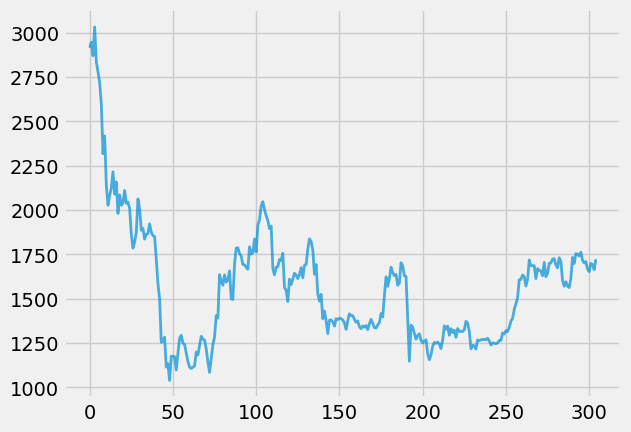

In [159]:
plt.plot(X_test_pred, label = 'X train Predict', lw=2,  alpha=.7)

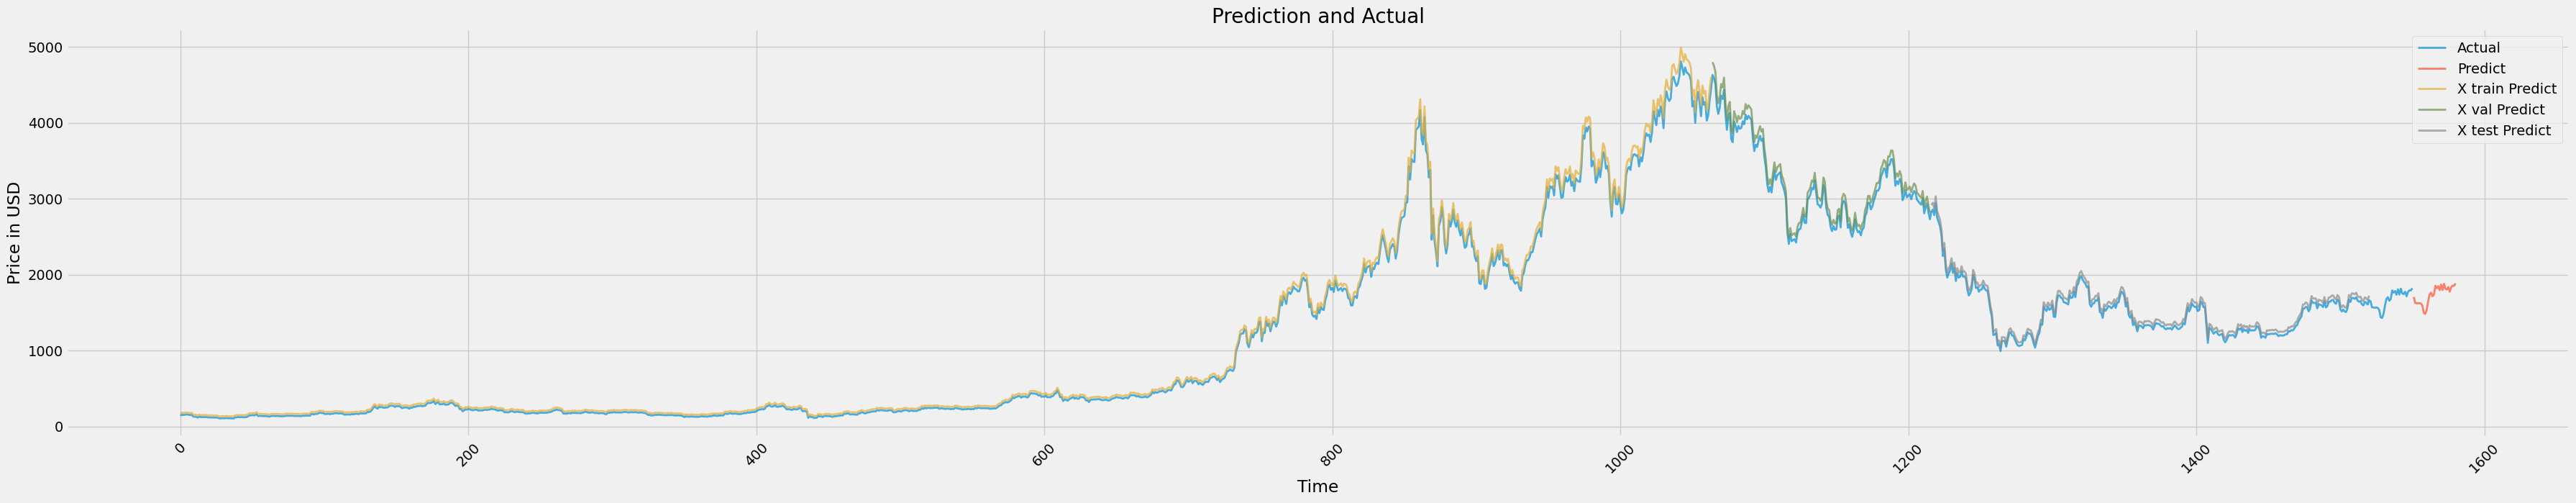

In [164]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(40,7))
plt.grid(True)

last_30_days = last_30_days.reshape(-1, 1)
aX_pred = np.concatenate([X,last_30_days])

plt.plot(actual, data['Close'], label = 'Actual', lw=2,  alpha=.7)
plt.plot(Predict, last_30_days, label = 'Predict', lw=2,  alpha=.7)
plt.plot(index_X_train, X_train_pred, label = 'X train Predict', lw=2,  alpha=.7)
plt.plot(index_X_val, X_val_pred, label = 'X val Predict', lw=2,  alpha=.7)
plt.plot(index_X_test, X_test_pred, label = 'X test Predict', lw=2,  alpha=.7)

plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

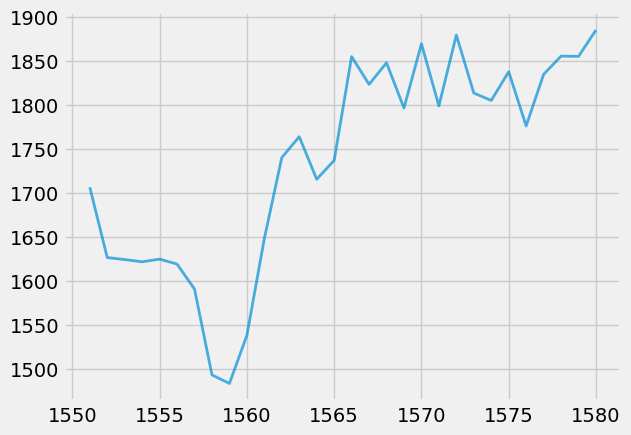

In [ ]:
plt.plot(Predict, last_30_days, label = 'Predict', lw=2,  alpha=.7 )


In [ ]:
last_30_days


array([[1706.11827779],
       [1626.28541388],
       [1623.99383458],
       [1621.48621003],
       [1624.47870575],
       [1618.89644524],
       [1590.4587605 ],
       [1493.0184796 ],
       [1483.31682548],
       [1537.89809311],
       [1647.86292869],
       [1739.8248339 ],
       [1763.52987076],
       [1715.17161147],
       [1736.66390538],
       [1854.47497175],
       [1822.96382224],
       [1847.41231696],
       [1796.0431583 ],
       [1869.06975993],
       [1798.49174094],
       [1878.93036787],
       [1813.13601132],
       [1804.67295284],
       [1837.29214675],
       [1775.74573869],
       [1834.33676183],
       [1855.00323007],
       [1854.73267443],
       [1884.67344658]])